In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge, RidgeCV

In [2]:
data = pd.read_csv("Wage.csv")

In [3]:
#names=['Unnamed:0','year','age','maritl','race','education','region','jobclass','health','health_ins','logwage','wage']
#data[['wage']]


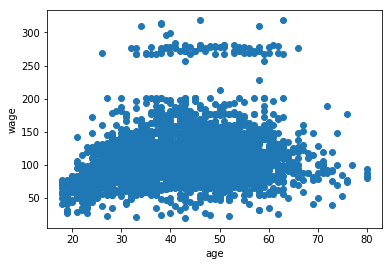

In [4]:
#data.groupby("wage")['age'].mean().plot(kind='bar')
x=data['age']
y=data['wage']
plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("wage")
plt.show()

From the scatter plot, we can observe that the wages are high between a certain range of age and then it starts decreasing with increase in age. 

In [5]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)
xTrain = xTrain.values.reshape(-1, 1)
xTest = xTest.values.reshape(-1, 1)
yTrain = yTrain.values.reshape(-1, 1)
yTest = yTest.values.reshape(-1, 1)

[[0.68259557]]


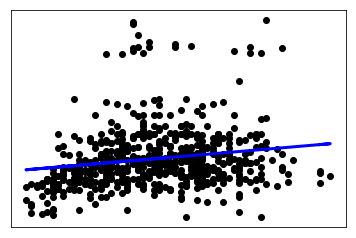

In [6]:
lm=LinearRegression()
lm.fit(xTrain,yTrain)
print(lm.coef_) #Coefficient w1, intercept w0 THIS IS WRONG COEF IS SOMETHING ELSE ENTIRELY
predictions = lm.predict(xTest)
plt.scatter(xTest, yTest,  color='black')
plt.plot(xTest, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [7]:
# predictions = lm.predict(xTest)
print('Score of linear Model is: %.2f' % r2_score(yTest, predictions))

Score of linear Model is: 0.04


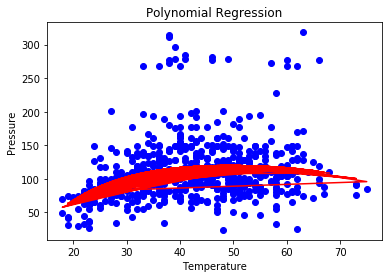

[[ 0.00000000e+00  1.63753117e+01 -4.12606718e-01  4.83015419e-03
  -2.27569012e-05]]
R2 score: 0.10


In [8]:
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(xTrain) 

lin2 = LinearRegression() 
lin2.fit(X_poly, yTrain)

predictions = lin2.predict(poly.fit_transform(xTest)) 
r2_test = r2_score(yTest, predictions)

# Visualising the Polynomial Regression results 
plt.scatter(xTest, yTest, color = 'blue') 
plt.plot(xTest, predictions, color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
plt.show() 

print(lin2.coef_)
print('R2 score: %.2f' %r2_test)

In [9]:
clf = Ridge(alpha=0.1)
clf.fit(X_poly, yTrain)
predictions = clf.predict(poly.fit_transform(xTest)) 
r2_test = r2_score(yTest, predictions)
print(clf.coef_)
print('R2 score: %.2f' % r2_score(yTest, predictions))


[[ 0.00000000e+00  1.63321044e+01 -4.11107031e-01  4.80822915e-03
  -2.26423591e-05]]
R2 score: 0.10


C:\Users\darsh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.644827e-18
  overwrite_a=True).T


In [10]:
clf = RidgeCV(alphas=[0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 1])
clf.fit(X_poly, yTrain)
predictions = clf.predict(poly.fit_transform(xTest)) 
r2_test = r2_score(yTest, predictions)
print('Best value for α is', clf.alpha_)

Best value for α is 1.0


In [11]:
data=data.replace('\D','',regex=True)
x=data[['age','education','health']]
y=data['wage']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)
xTrain = xTrain.values.reshape(-1, 3)
xTest = xTest.values.reshape(-1, 3)
yTrain = yTrain.values.reshape(-1, 1)
yTest = yTest.values.reshape(-1, 1)

lm=LinearRegression()
lm.fit(xTrain,yTrain)
print(lm.coef_,lm.intercept_) #Coefficient w1, intercept w0
predictions = lm.predict(xTest)
print('R2 score: %.2f' % r2_score(yTest, predictions))

[[ 0.61111773 15.45027836  8.44397036]] [24.20982972]
R2 score: 0.23
